In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('temp.csv')

In [4]:
df.head()

,Date,Condition,Cloud Cover (%),Max Temp (°C),Min Temp (°C),Humidity (%)
0,July 26 2019,Overcast,94.27,32,25,95
1,July 27 2019,Overcast,100.00,31,25,95
2,July 28 2019,Overcast,100.00,31,24,95
3,July 29 2019,Overcast,100.00,32,24,94
4,July 30 2019,Overcast,100.00,32,25,96


<BarContainer object of 47 artists>

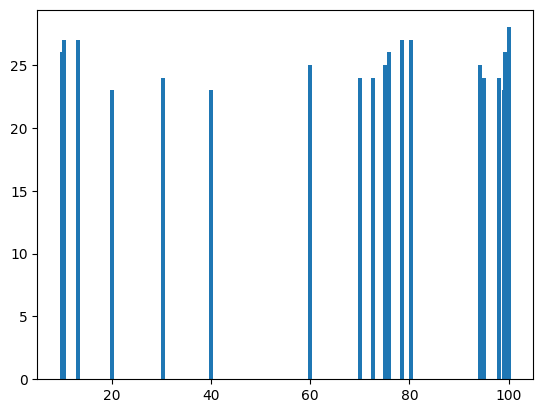

In [ ]:
# plot df cloud cover and max temp

import matplotlib.pyplot as plt



In [5]:
df1= pd.read_csv('weather_classification_data.csv')

In [6]:
df1.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [12]:
df3= pd.read_csv("delhi.csv")

<Axes: ylabel='Frequency'>

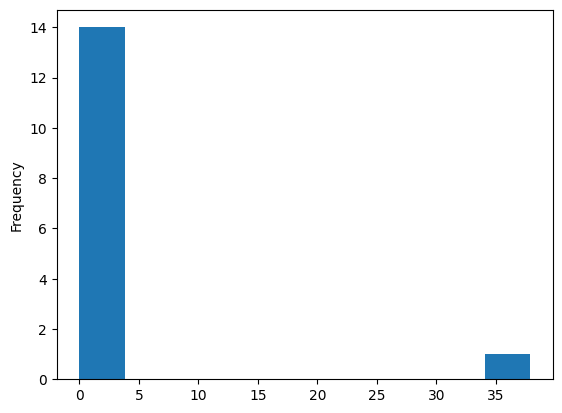

In [14]:
df3['cloudcover'].plot(kind='hist', bins=10)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

# Load data
data = pd.read_csv("temp.csv")

from sklearn.preprocessing import OneHotEncoder

# One-hot encode 'Condition' column
encoder = OneHotEncoder(sparse_output=False) 
encoded_conditions = encoder.fit_transform(data[['Condition']])

# Ensure that the number of columns matches
condition_columns = encoder.get_feature_names_out(input_features=['Condition'])
encoded_df = pd.DataFrame(encoded_conditions, columns=condition_columns, index=data.index)

# Concatenate encoded features with the dataset
data = pd.concat([data, encoded_df], axis=1)
data.drop(['Condition'], axis=1, inplace=True)

# Select features and target variables
X = data[['Cloud Cover (%)', 'Humidity (%)'] + list(condition_columns)]
y_max_temp = data['Max Temp (°C)']
y_min_temp = data['Min Temp (°C)']

# Train-test split
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max_temp, test_size=0.2, random_state=42)
_, _, y_min_train, y_min_test = train_test_split(X, y_min_temp, test_size=0.2, random_state=42)

# Train XGBoost models
xgb_max_temp = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_min_temp = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_max_temp.fit(X_train, y_max_train)
xgb_min_temp.fit(X_train, y_min_train)

# Predictions
y_max_pred = xgb_max_temp.predict(X_test)
y_min_pred = xgb_min_temp.predict(X_test)

# Evaluation
max_temp_mae = mean_absolute_error(y_max_test, y_max_pred)
min_temp_mae = mean_absolute_error(y_min_test, y_min_pred)

print(f"MAE for Max Temp Prediction: {max_temp_mae:.2f}")
print(f"MAE for Min Temp Prediction: {min_temp_mae:.2f}")


MAE for Max Temp Prediction: 1.33
MAE for Min Temp Prediction: 1.69


In [20]:
# After training
import pickle

# Save XGBoost models
pickle.dump(xgb_max_temp, open('models/xgb_max_temp_model.pkl', 'wb'))
pickle.dump(xgb_min_temp, open('models/xgb_min_temp_model.pkl', 'wb'))

# Save encoder
pickle.dump(encoder, open('models/condition_encoder.pkl', 'wb'))